# Comparison Loss Function and Validation Score

1) Import der einzelnen Libraries. Sortieren der Daten nach der Zielkategorie für den ersten Überblick.
2) Aufteilen der Trainings- und Testdaten. Erstellen von notwendigen Listen
3) Erstellen von Funktionen 
4) initialisieren der einzelnen MLPClassifier Netze 
5) Ergebnisse: Textuelle Daten, geplottete Vergleiche, prozentuale Heatmaps und Reports

## imports and data

In [344]:
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, balanced_accuracy_score, roc_auc_score, top_k_accuracy_score, cohen_kappa_score, matthews_corrcoef, hinge_loss
from sklearn.metrics import plot_confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import RocCurveDisplay, accuracy_score, recall_score, precision_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np
import pandas as pd
covertype = fetch_covtype()
forest = fetch_covtype(as_frame=True)
covertype.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [129]:
forest.target

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [217]:
forestlist = forest.frame
forestlistFiltered = forestlist.filter(items=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Cover_Type'])

In [216]:
forestlist = forest.frame
forestlistSorted = forestlist.sort_values(by='Cover_Type')
forestlistSorted

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
290505,2928.0,58.0,7.0,150.0,-7.0,1836.0,226.0,225.0,133.0,190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532739,3015.0,343.0,18.0,376.0,50.0,3378.0,181.0,211.0,166.0,1982.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532740,3018.0,341.0,18.0,350.0,53.0,3398.0,180.0,211.0,168.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532741,3021.0,345.0,18.0,324.0,45.0,3419.0,182.0,209.0,164.0,2029.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532742,3023.0,349.0,19.0,300.0,47.0,3439.0,182.0,206.0,160.0,2052.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399826,3334.0,356.0,10.0,558.0,100.0,765.0,204.0,223.0,156.0,1642.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399825,3333.0,6.0,7.0,601.0,99.0,806.0,212.0,226.0,152.0,1583.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399824,3334.0,3.0,5.0,601.0,39.0,845.0,214.0,231.0,155.0,1524.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399812,3331.0,246.0,3.0,660.0,117.0,859.0,213.0,241.0,166.0,1113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


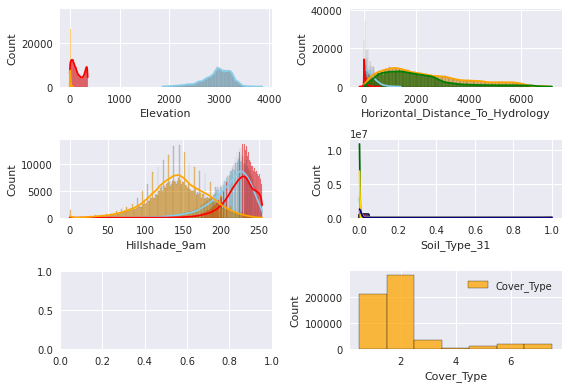

In [500]:
plotData()

## training and test data

In [2]:
covertype['data'].shape

(581012, 54)

In [3]:
X_c = covertype['data']
y_c = covertype['target']

In [4]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c)
print(X_train_c.shape) 
print(X_test_c.shape)

(435759, 54)
(145253, 54)


In [5]:
scaler_c = StandardScaler()
# Fit only to the training data
scaler_c.fit(X_train_c)

StandardScaler()

In [6]:
X_train_c = scaler_c.transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

In [486]:
classificationList = []
curve = []
validation = []
iteration = []

#validationList = []
#curve_test = []
#validation_test = []
#iteration_test = []

accuracyList = []
recallList = []
precisionList = []

## functions

In [499]:
def plotData():
    fig, axes = plt.subplots(3,2)
    sns.histplot(data=forestlistSorted, x="Elevation", color="skyblue", label="Elevation", kde=True, ax=axes[0,0])
    sns.histplot(data=forestlistSorted, x="Aspect", color="red", label="Aspect", kde=True, ax=axes[0,0])
    sns.histplot(data=forestlistSorted, x="Slope", color="orange", label="Slope", kde=True, ax=axes[0,0])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Hydrology", color="skyblue", label="Horizontal_Distance_To_Hydrology", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Vertical_Distance_To_Hydrology", color="red", label="Vertical_Distance_To_Hydrology", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Roadways", color="orange", label="Horizontal_Distance_To_Roadways", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Fire_Points", color="green", label="Horizontal_Distance_To_Fire_Points", kde=True, ax=axes[0,1])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Hillshade_9am", color="skyblue", label="Hillshade_9am", kde=True, ax=axes[1,0])
    sns.histplot(data=forestlistSorted, x="Hillshade_Noon", color="red", label="Hillshade_Noon", kde=True, ax=axes[1,0])
    sns.histplot(data=forestlistSorted, x="Hillshade_3pm", color="orange", label="Hillshade_3pm", kde=True, ax=axes[1,0])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Soil_Type_31", color="skyblue", label="Soil_Type_31", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_32", color="red", label="Soil_Type_32", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_33", color="orange", label="Soil_Type_33", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_34", color="cyan", label="Soil_Type_34", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_35", color="darkgreen", label="Soil_Type_35", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_36", color="gold", label="Soil_Type_36", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_37", color="purple", label="Soil_Type_37", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_38", color="silver", label="Soil_Type_38", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_39", color="navy", label="Soil_Type_39", kde=True, ax=axes[1,1])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Cover_Type", color="orange", label="Cover_Type",  ax=axes[2,1], discrete=True, kde=False)
    plt.legend() 
    fig.tight_layout()

In [399]:
def addToList(mlp, liste):
    liste.append(mlp)

In [400]:
def removeFromList(mlp, liste):
    liste.remove(mlp)

In [421]:
def comparison(List):
    for mlp in List:
        print(mlp)
        print('\nparamters: ' + str(mlp.get_params(deep=True)))
        print('\nlast loss: ' + str(mlp.loss_))
        print('\nnumber of features seen during fit: ' + str(mlp.n_features_in_))
        print('\nnumber of layers: ' + str(mlp.n_layers_))
        print('\nnumber of outputs: ' + str(mlp.n_outputs_))
        print('\nname of output activation function: ' + str(mlp.out_activation_) )
        print('\nnumber of iterations: ' +str(mlp.n_iter_) )
        print('\nnumber training samples seen by the solver during fitting: ' +str(mlp.t_) )
        print('****************************************************************************************')

In [402]:
def curveValidateIteration(List, c, v, i):
    for mlp in List:
        c.append(mlp.loss_curve_)
        v.append(mlp.validation_scores_)
        i.append(np.arange(1, mlp.n_iter_+1))

__________________________________________________________________________________________________________________________________

In [473]:
cmap = ListedColormap(["coral", "azure", "indigo", "darkgreen", "lightblue", "crimson", "gold", "silver", "teal"])
def plotCurvePerInteration(List, curvy, iterate):
    print('default: hidden_layer = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, learning_rate_init = 0.001, max_iter = 200, shuffle = true, early_stopping & warm_start = FALSE')
    print('Alle Infos, die davon abweichen, werden in der Legende gelistet')
    print('****************************************************************************************')
    for i,c,cl in zip(iterate, curvy, List):
        plt.scatter(i,c, marker = '.', label = str(cl))
    plt.title('Losscurve per iteration')
    plt.xlabel("iteration")
    plt.ylabel("loss curve")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [404]:
def plotValidationPerInteration(List, validate, iterate):
    for i,v, cl in zip(iterate, validate, List):
        plt.scatter(i,v, marker = '.', label = str(cl))
    plt.title('Validation per iteration')
    plt.xlabel("iteration")
    plt.ylabel("validation")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [405]:
def plotValidationPercurve(List, validate, curvy):
    for c,v,cl in zip(validate, curvy, List):
        plt.scatter(c,v, marker = '.', label = str(cl))
    plt.title('Validation per curve')
    plt.xlabel("validation")
    plt.ylabel("curve")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()


In [467]:
#def plotTrainingAndTestLoss():
#    for i,c1,c2, cl, vl in zip(iteration, curve, curve_test,classificationList, validationList):
#        plt.scatter(i,c1, marker = '.', label = str(cl))
#        plt.scatter(i, c2, marker = '.', label = str(vl))
#        plt.title('Validation per iteration')
#        plt.xlabel("iteration")
#        plt.ylabel("validation")
#        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#        plt.show()

__________________________________________________________________________________________________________________________________

In [406]:
def heatmaping(List):
    for mlp in List:
        print(mlp)
        predictions = mlp.predict(X_test_c)   
        con_ma = confusion_matrix(y_test_c,predictions)
        con_ma_perc = np.empty([7, 7], dtype=float)

        for i in range(0, 7):
            number = 0.0
            for j in range(0, 7):
                number += con_ma[i][j]
            for j in range(0, 7):
                con_ma_perc[i][j] = 100/number*con_ma[i][j]

        tree = ['Spruce', 'Lodgepole Pine', 'PoderosaPine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

        # ======== Plot confuse matrix prozentual ========

        ay = sns.heatmap(con_ma_perc, annot=True, cmap='coolwarm', yticklabels=tree, xticklabels=tree, fmt='.2f', vmin=0, vmax=100)
        ay.xaxis.tick_top()
        ay.xaxis.set_label_position('top')
        plt.xticks(rotation=90)
        ay.set(title="Confusion Matrix - Recall",
              xlabel="- Predicted Tree -",
              ylabel="- Actual Tree -")
        plt.show()

In [407]:
def reporting(List):
    for mlp in List:
        print(mlp)
        predictions = mlp.predict(X_test_c)
        print(classification_report(y_test_c,predictions))

In [408]:
def accuracyPlotting(List):
        for mlp in List:
            print(mlp)
            predictions = mlp.predict(X_test_c)
            accuracy = accuracy_score(y_test_c, predictions)
            recall = recall_score(y_test_c, predictions, average = 'weighted')
            precision = precision_score(y_test_c, predictions, average = 'weighted')
            
            addToList(accuracy, accuracyList)
            addToList(recall, recallList)
            addToList(precision, precisionList)
            
            print('Accuracy: \t{0:.2f}'.format(accuracy * 100.0))
            print('Recall: \t{0:.2f}'.format(recall * 100.0))
            print('precision: \t{0:.2f}'.format(precision * 100.0))

## initializing nets

In [409]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(60,60,60), activation ='tanh', max_iter = 150, early_stopping = True, verbose = True)
mlp_1train = mlp_1.fit(X_train_c,y_train_c)

Iteration 1, loss = 0.59471959
Validation score: 0.781370
Iteration 2, loss = 0.46679730
Validation score: 0.816872
Iteration 3, loss = 0.41076976
Validation score: 0.836125
Iteration 4, loss = 0.37463655
Validation score: 0.850606
Iteration 5, loss = 0.34717193
Validation score: 0.861598
Iteration 6, loss = 0.32651820
Validation score: 0.870158
Iteration 7, loss = 0.30952472
Validation score: 0.876285
Iteration 8, loss = 0.29583295
Validation score: 0.880255
Iteration 9, loss = 0.28412829
Validation score: 0.886291
Iteration 10, loss = 0.27336509
Validation score: 0.890949
Iteration 11, loss = 0.26437737
Validation score: 0.891959
Iteration 12, loss = 0.25623515
Validation score: 0.895149
Iteration 13, loss = 0.24898784
Validation score: 0.898293
Iteration 14, loss = 0.24285185
Validation score: 0.900174
Iteration 15, loss = 0.23719152
Validation score: 0.902010
Iteration 16, loss = 0.23228474
Validation score: 0.904672
Iteration 17, loss = 0.22758263
Validation score: 0.905797
Iterat

/opt/jupyterhub/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


__________________________________________________________________________________________________________________________________

In [412]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(60,60,60), activation ='relu', max_iter = 150, early_stopping = True, verbose = True)
mlp_3train = mlp_3.fit(X_train_c,y_train_c)

Iteration 1, loss = 0.59880559
Validation score: 0.777974
Iteration 2, loss = 0.48185718
Validation score: 0.804044
Iteration 3, loss = 0.43783415
Validation score: 0.816459
Iteration 4, loss = 0.40947217
Validation score: 0.832545
Iteration 5, loss = 0.38977579
Validation score: 0.829011
Iteration 6, loss = 0.37428479
Validation score: 0.849321
Iteration 7, loss = 0.36058110
Validation score: 0.848839
Iteration 8, loss = 0.35044654
Validation score: 0.858638
Iteration 9, loss = 0.34119298
Validation score: 0.857054
Iteration 10, loss = 0.33283167
Validation score: 0.861896
Iteration 11, loss = 0.32531500
Validation score: 0.867496
Iteration 12, loss = 0.31834304
Validation score: 0.868115
Iteration 13, loss = 0.31294462
Validation score: 0.870732
Iteration 14, loss = 0.30814704
Validation score: 0.875321
Iteration 15, loss = 0.30265154
Validation score: 0.873990
Iteration 16, loss = 0.29798406
Validation score: 0.874495
Iteration 17, loss = 0.29377348
Validation score: 0.877226
Iterat

In [56]:
mlp_4 = MLPClassifier(hidden_layer_sizes=(60,60,60), max_iter = 150, early_stopping = True, verbose = True, learning_rate = 'adaptive')
mlp_4.fit(X_train_c,y_train_c)

Iteration 1, loss = 0.58746704
Validation score: 0.786304
Iteration 2, loss = 0.47420239
Validation score: 0.813177
Iteration 3, loss = 0.42997879
Validation score: 0.829883
Iteration 4, loss = 0.40039241
Validation score: 0.837227
Iteration 5, loss = 0.37913228
Validation score: 0.846544
Iteration 6, loss = 0.36239482
Validation score: 0.854622
Iteration 7, loss = 0.34931309
Validation score: 0.855861
Iteration 8, loss = 0.33823572
Validation score: 0.861254
Iteration 9, loss = 0.33014496
Validation score: 0.860634
Iteration 10, loss = 0.32149576
Validation score: 0.862585
Iteration 11, loss = 0.31491928
Validation score: 0.866004
Iteration 12, loss = 0.30764908
Validation score: 0.872774
Iteration 13, loss = 0.30148680
Validation score: 0.876124
Iteration 14, loss = 0.29697270
Validation score: 0.874059
Iteration 15, loss = 0.29114308
Validation score: 0.877708
Iteration 16, loss = 0.28753542
Validation score: 0.879177
Iteration 17, loss = 0.28366760
Validation score: 0.880875
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(60, 60, 60),
              learning_rate='adaptive', max_iter=250, n_iter_no_change=5,
              verbose=True)

In [415]:
mlp_5 = MLPClassifier(hidden_layer_sizes=(60,60,60), activation ='tanh', max_iter = 150, early_stopping = True, verbose = True, n_iter_no_change =5, learning_rate_init= 0.005, warm_start = True)
mlp_5train = mlp_5.fit(X_train_c,y_train_c)

Iteration 1, loss = 0.50528644
Validation score: 0.832316
Iteration 2, loss = 0.36938720
Validation score: 0.860290
Iteration 3, loss = 0.32548783
Validation score: 0.871948
Iteration 4, loss = 0.30166020
Validation score: 0.875321
Iteration 5, loss = 0.28772193
Validation score: 0.888930
Iteration 6, loss = 0.27802813
Validation score: 0.886818
Iteration 7, loss = 0.27085160
Validation score: 0.888012
Iteration 8, loss = 0.26631941
Validation score: 0.895332
Iteration 9, loss = 0.26231624
Validation score: 0.894759
Iteration 10, loss = 0.25958442
Validation score: 0.895447
Iteration 11, loss = 0.25727178
Validation score: 0.896296
Iteration 12, loss = 0.25579577
Validation score: 0.895745
Iteration 13, loss = 0.25462791
Validation score: 0.897971
Iteration 14, loss = 0.25225312
Validation score: 0.893175
Iteration 15, loss = 0.25197664
Validation score: 0.893451
Iteration 16, loss = 0.24964406
Validation score: 0.898614
Iteration 17, loss = 0.25044151
Validation score: 0.897650
Iterat

In [138]:
mlp_6 = MLPClassifier(hidden_layer_sizes=(60,60,60), activation ='tanh', max_iter = 250, early_stopping = True, verbose = True, solver = 'sgd', momentum =  0.7)
#mlp_6.fit(X_train_c,y_train_c)

Iteration 1, loss = 0.95579812
Validation score: 0.693272
Iteration 2, loss = 0.72056513
Validation score: 0.713673
Iteration 3, loss = 0.68528298
Validation score: 0.719846
Iteration 4, loss = 0.66724903
Validation score: 0.725170
Iteration 5, loss = 0.65423114
Validation score: 0.727120
Iteration 6, loss = 0.64366393
Validation score: 0.729645
Iteration 7, loss = 0.63452080
Validation score: 0.732238
Iteration 8, loss = 0.62634335
Validation score: 0.735038
Iteration 9, loss = 0.61889089
Validation score: 0.738893
Iteration 10, loss = 0.61194075
Validation score: 0.740178
Iteration 11, loss = 0.60546440
Validation score: 0.744056
Iteration 12, loss = 0.59938282
Validation score: 0.746282
Iteration 13, loss = 0.59363266
Validation score: 0.748462
Iteration 14, loss = 0.58816392
Validation score: 0.749679
Iteration 15, loss = 0.58293650
Validation score: 0.751905
Iteration 16, loss = 0.57796313
Validation score: 0.753970
Iteration 17, loss = 0.57315655
Validation score: 0.755668
Iterat

/opt/jupyterhub/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60), max_iter=250, momentum=0.7,
              solver='sgd', verbose=True)

In [416]:
mlp_7 = MLPClassifier(hidden_layer_sizes=(70,70,70), activation ='tanh', max_iter = 150, early_stopping = True, verbose = True)
mlp_7train = mlp_7.fit(X_train_c,y_train_c)

Iteration 1, loss = 0.59086388
Validation score: 0.782564
Iteration 2, loss = 0.46157539
Validation score: 0.822999
Iteration 3, loss = 0.39800088
Validation score: 0.843997
Iteration 4, loss = 0.35465933
Validation score: 0.860428
Iteration 5, loss = 0.32460167
Validation score: 0.873141
Iteration 6, loss = 0.30169372
Validation score: 0.880576
Iteration 7, loss = 0.28393592
Validation score: 0.887966
Iteration 8, loss = 0.26947847
Validation score: 0.893588
Iteration 9, loss = 0.25695300
Validation score: 0.896985
Iteration 10, loss = 0.24711239
Validation score: 0.897076
Iteration 11, loss = 0.23820038
Validation score: 0.904649
Iteration 12, loss = 0.23071337
Validation score: 0.904603
Iteration 13, loss = 0.22366909
Validation score: 0.906875
Iteration 14, loss = 0.21717804
Validation score: 0.910088
Iteration 15, loss = 0.21186284
Validation score: 0.913898
Iteration 16, loss = 0.20706154
Validation score: 0.915252
Iteration 17, loss = 0.20228344
Validation score: 0.915917
Iterat

In [513]:
addToList(mlp_1train, classificationList)
addToList(mlp_3train, classificationList)
addToList(mlp_5train, classificationList)
addToList(mlp_7train, classificationList)

In [514]:
classificationList

[MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(60, 60, 60), max_iter=150, verbose=True),
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(60, 60, 60),
               max_iter=150, verbose=True),
 MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(60, 60, 60), learning_rate_init=0.005,
               max_iter=150, n_iter_no_change=5, verbose=True, warm_start=True),
 MLPClassifier(activation='tanh', early_stopping=True,
               hidden_layer_sizes=(70, 70, 70), max_iter=150, verbose=True)]

## Results

In [485]:
comparison(classificationList)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60), max_iter=150, verbose=True)

paramters: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (60, 60, 60), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 150, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}

last loss: 1.6400611850077423e-01

number of features seen during fit: 54

number of layers: 5

number of outputs: 7

name of output activation function: softmax

number of iterations: 95

number training samples seen by the solver during fitting: 12419065
****************************************************************************************
MLPClassifier(early_stop

default: hidden_layer = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, learning_rate_init = 0.001, max_iter = 200, shuffle = true, early_stopping & warm_start = FALSE
Alle Infos, die davon abweichen, werden in der Legende gelistet
****************************************************************************************


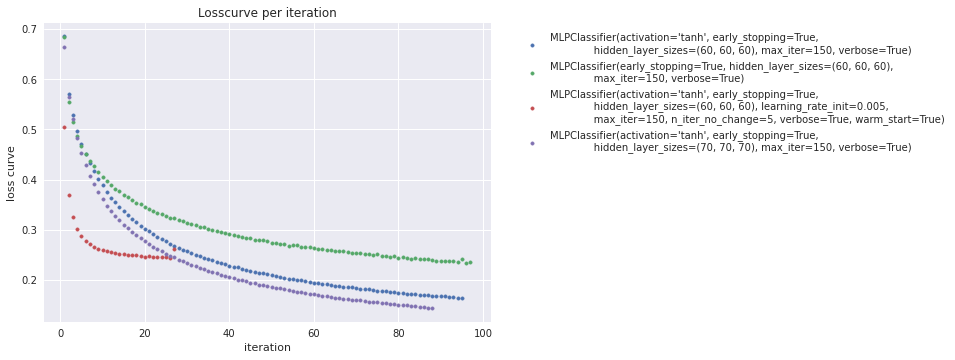

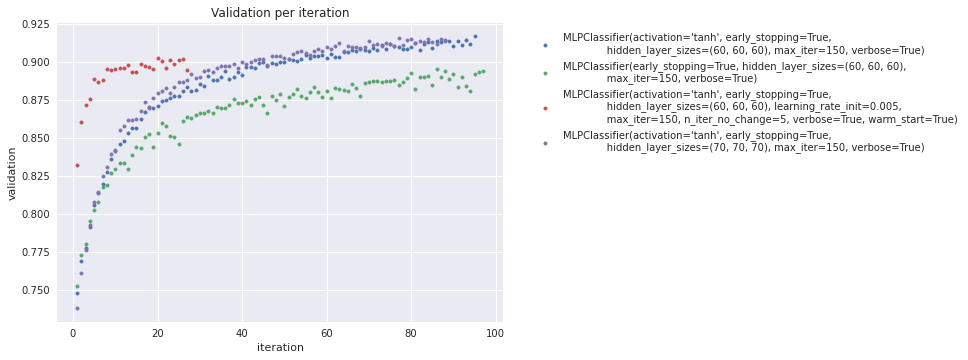

In [481]:
curveValidateIteration(classificationList, curve, validation, iteration)
plotCurvePerInteration(classificationList, curve, iteration)
plotValidationPerInteration(classificationList, validation, iteration)

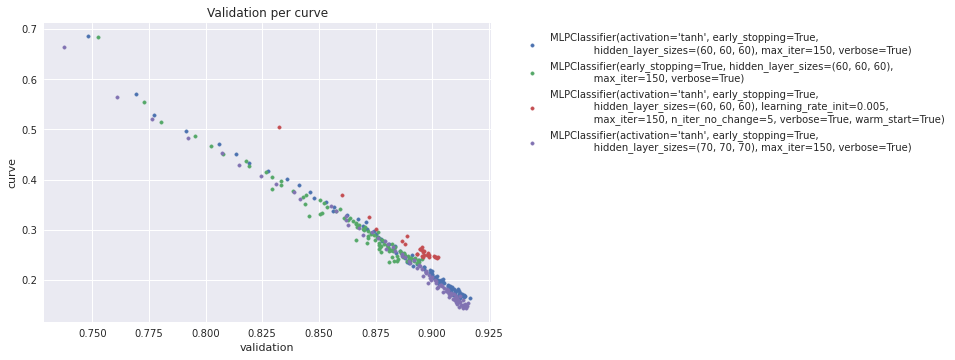

In [484]:
plotValidationPercurve(classificationList, validation, curve)

## Heatmaps

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60), max_iter=150, verbose=True)


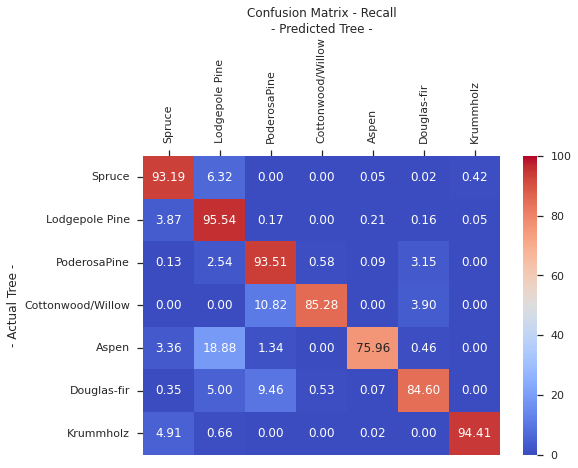

MLPClassifier(early_stopping=True, hidden_layer_sizes=(60, 60, 60),
              max_iter=150, verbose=True)


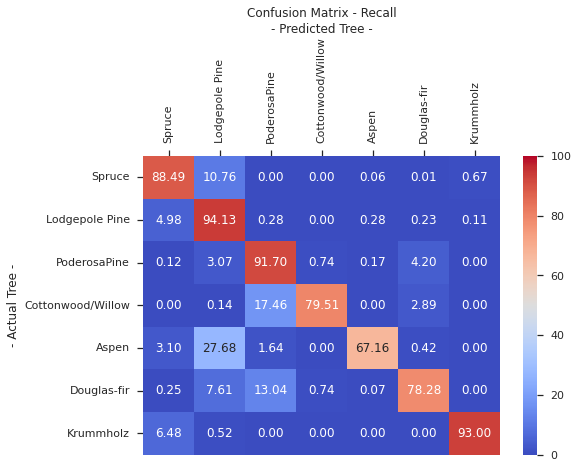

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60), learning_rate_init=0.005,
              max_iter=150, n_iter_no_change=5, verbose=True, warm_start=True)


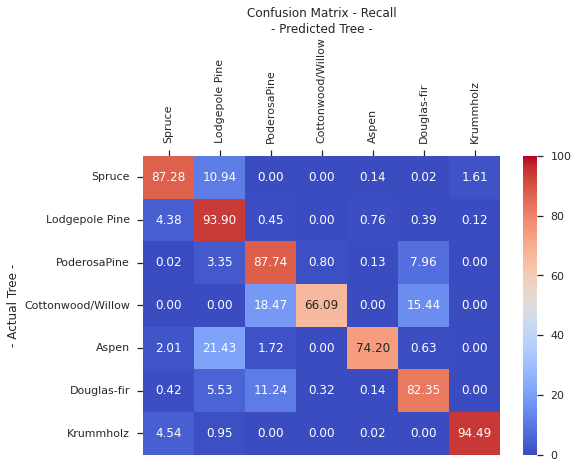

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), max_iter=150, verbose=True)


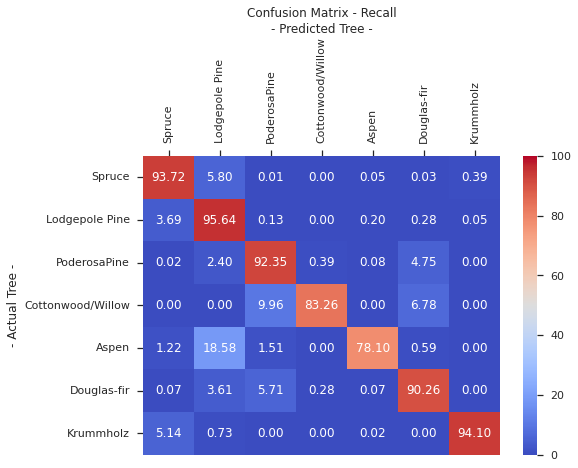

In [515]:
heatmaping(classificationList)

In [516]:
reporting(classificationList)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60), max_iter=150, verbose=True)
              precision    recall  f1-score   support

           1       0.94      0.93      0.94     52857
           2       0.94      0.96      0.95     70923
           3       0.93      0.94      0.93      8900
           4       0.89      0.85      0.87       693
           5       0.91      0.76      0.83      2384
           6       0.89      0.85      0.87      4324
           7       0.95      0.94      0.95      5172

    accuracy                           0.94    145253
   macro avg       0.92      0.89      0.90    145253
weighted avg       0.94      0.94      0.94    145253

MLPClassifier(early_stopping=True, hidden_layer_sizes=(60, 60, 60),
              max_iter=150, verbose=True)
              precision    recall  f1-score   support

           1       0.92      0.88      0.90     52857
           2       0.91      0.94      0.92     70923
 

In [517]:
accuracyPlotting(classificationList)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60), max_iter=150, verbose=True)
Accuracy: 	93.82
Recall: 	93.82
precision: 	93.80
MLPClassifier(early_stopping=True, hidden_layer_sizes=(60, 60, 60),
              max_iter=150, verbose=True)
Accuracy: 	90.90
Recall: 	90.90
precision: 	90.90
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 60, 60), learning_rate_init=0.005,
              max_iter=150, n_iter_no_change=5, verbose=True, warm_start=True)
Accuracy: 	90.34
Recall: 	90.34
precision: 	90.45
MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(70, 70, 70), max_iter=150, verbose=True)
Accuracy: 	94.18
Recall: 	94.18
precision: 	94.19
